# Project 2:  Holiday weather

by M.A. Flores, 10 November 2015

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

This project is about finding a fortnight to take a holiday. In this case, I have chosen Barcelona, where I come from. We need to find the sunniest and driest two weeks over the last year 2014. Of course, the weather in the summer of 2016 may be very different to 2014 but it should give some indication of when would be a good time to take a summer break.

## Getting the data

If you haven't already downloaded the dataset for Barcelona right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'Barcelona' in the 'Location' input box and when the pop up menu comes up with the option 'London, United Kingdom' select it and then click on 'Submit'. 

When the next page opens click on the 'Custom' tab and selet the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed. Scroll to the end of the data  and then right click on the blue link labelled 'Comma Delimited File':

- if you are using the Safari Browser choose Download Linked File As ... 
- if you are using the Chrome Browser choose Save Link As ... 

then, in the File dialogue that appears save the file with its default name of 'CustomHistory' to the folder you created for this course and where this notebook is located. Once the file has been downloaded rename it *from* 'CustomHistory.html' *to* 'Barcelona_2014.csv'.

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [116]:
from pandas import *
import matplotlib.pyplot as plt

barcelona = read_csv('Barcelona_2014.csv', skipinitialspace=True, header=None, skiprows=7, sep=',')
oldColumns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
newColumns = ['GMT','Max TemperatureC','Mean TemperatureC','Min TemperatureC','Dew PointC','MeanDew PointC',
              'Min DewpointC','Max Humidity', 'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
              'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa', 'Max VisibilityKm', 
              'Mean VisibilityKm', 'Min VisibilitykM', 'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 
              'Max Gust SpeedKm/h', 'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees']
barcelona = barcelona.rename(columns=dict(zip(oldColumns,newColumns)))
barcelona

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66,9.91,4,Lluvia,186
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50,1.02,2,Lluvia,214
2,2014-1-3,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69,7.11,2,Lluvia-Tormenta,219
3,2014-1-4,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39,9.91,4,Lluvia,211
4,2014-1-5,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5,Lluvia,199
5,2014-1-6,12,10,8,11,8,6,94,78,60,...,31,12,5,50,29,61,2.03,4,Lluvia,219
6,2014-1-7,12,10,8,8,7,6,87,78,63,...,31,13,5,39,27,55,5.08,3,Lluvia,219
7,2014-1-8,12,9,7,11,7,6,94,85,69,...,27,14,6,24,18,37,1.02,3,Lluvia,197
8,2014-1-9,11,8,5,11,5,2,94,76,53,...,31,13,5,40,26,60,0.00,4,Lluvia,247
9,2014-1-10,11,7,2,7,4,2,93,85,66,...,31,17,10,24,13,32,0.25,3,Lluvia,216


##Cleaning the data
As we changed the column names, we don't need to arrange anything about it.

In [112]:
barcelona.columns

Index(['GMT', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

Let's see what are the column types that the import function detected:

In [113]:
barcelona.dtypes

GMT                            object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object

We need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [117]:
barcelona['GMT'] = to_datetime(barcelona['GMT'])
barcelona = barcelona.sort('GMT')

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [118]:
barcelona.index = barcelona['GMT']

In [119]:
barcelona.head()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66,9.91,4,Lluvia,186
2014-01-02,2014-01-02,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50,1.02,2,Lluvia,214
2014-01-03,2014-01-03,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69,7.11,2,Lluvia-Tormenta,219
2014-01-04,2014-01-04,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39,9.91,4,Lluvia,211
2014-01-05,2014-01-05,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5,Lluvia,199


##Finding a break

Let's take a look at the extreme values about temperature and humidity. In Barcelona, humidity and high temperatures can generate a discomfort sensations in some people. As an example on how the termical sensation differs with humidity:

![](http://blogs.diariosur.es/tormentas-y-rayos/files/2013/08/1146969_10201752516564218_1390901565_o-600x360.jpg)

So, we can create a new column that shows the real termical sensation, arranging the temperature with the humidity values. We will use the formula (found here: http://www.hidromet.com.pa/sensacion_termica.php):

$AT= -9.93122+1.186145T+0.122310HR$

Where AT is the Apparent Temperature, T is the real temperature and HR is the Humidity Rate.

In [135]:
barcelona['Apparent Mean Temp C'] = -9.93122 + 1.186145 * barcelona['Mean TemperatureC'] + 0.122310 * barcelona['Mean Humidity']
barcelona['Apparent Max Temp C'] = -9.93122 + 1.186145 * barcelona['Max TemperatureC'] + 0.122310 * barcelona['Max Humidity']

In [137]:
barcelona['Apparent Mean Temp C'].max()

26.119480000000003

In [139]:
barcelona['Apparent Max Temp C'].max()

37.15027

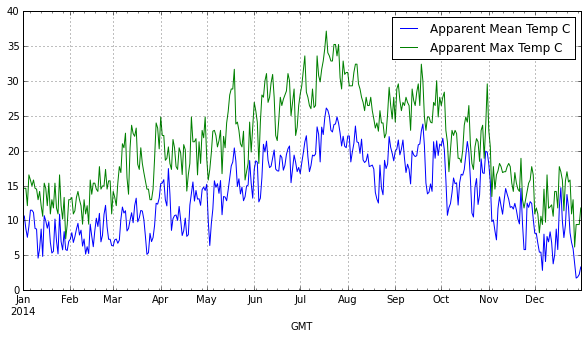

In [149]:
fig = plt.figure()
barcelona[['Apparent Mean Temp C','Apparent Max Temp C']].plot(figsize=(10,5), grid=True)
ax.set_ylabel('Temperature ºC')
plt.show()

It seems that 2014 it wasn't a warm year for Barcelona neither.

In [146]:
barcelona[(barcelona['Apparent Mean Temp C'] >= 22) & (barcelona['Apparent Max Temp C'] <= 35)]['GMT']

GMT
2014-07-05   2014-07-05
2014-07-12   2014-07-12
2014-07-13   2014-07-13
2014-07-15   2014-07-15
2014-07-16   2014-07-16
2014-07-17   2014-07-17
2014-07-19   2014-07-19
2014-07-20   2014-07-20
2014-07-21   2014-07-21
2014-07-22   2014-07-22
2014-07-25   2014-07-25
2014-07-27   2014-07-27
2014-07-29   2014-07-29
2014-08-01   2014-08-01
2014-08-02   2014-08-02
2014-08-06   2014-08-06
2014-08-28   2014-08-28
2014-09-18   2014-09-18
2014-09-19   2014-09-19
Name: GMT, dtype: datetime64[ns]

So, we can try to add the rain as a factor to consider from July to September, although is unusual that it rains a lot in Barcelona summer.

In [147]:
goodWeather = barcelona.ix[datetime(2014,7,1) : datetime(2014,9,30)]

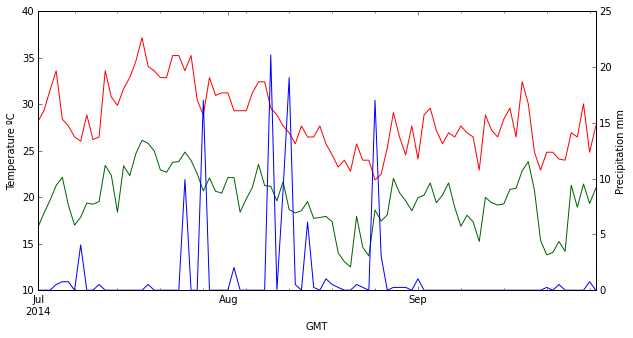

In [152]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

goodWeather['Apparent Max Temp C'].plot(ax=ax, figsize=(10,5), color='Red')
goodWeather['Apparent Mean Temp C'].plot(ax=ax, figsize=(10,5), color='DarkGreen')
goodWeather['Precipitationmm'].plot(ax=ax2, figsize=(10,5), color='Blue')

ax.set_ylabel('Temperature ºC')
ax2.set_ylabel('Precipitation mm')

plt.show()


It seems that the second half of July and the first half of September would be the best moments to visit Barcelona. Let's have a closer look by just plotting mean temperature and precipitation for July and September.

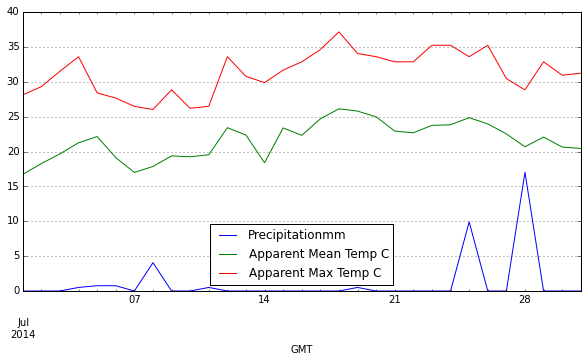

In [157]:
july = goodWeather.ix[datetime(2014,7,1) : datetime(2014,7,31)]
july[['Precipitationmm', 'Apparent Mean Temp C', 'Apparent Max Temp C']].plot(grid=True, figsize=(10,5))

It seems that the second and third weeks of July could be the best, as the temperatures are high -despite one day that the maximum peak was over 35-, and there wasn't rains.

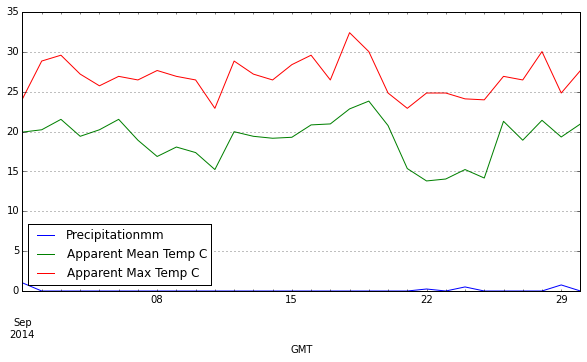

In [158]:
september = goodWeather.ix[datetime(2014,9,1) : datetime(2014,9,30)]
september[['Precipitationmm', 'Apparent Mean Temp C', 'Apparent Max Temp C']].plot(grid=True, figsize=(10,5))

If you prefer lower temperatures, you can choose the first two weeks of September or maybe the second and third weeks. In late September we have a phenomena that is called "veranillo", like in "little Summer", so despite the graph, you can usually expect good temperatures in the second half of September too.

## Conclusions

As 2014 wasn't a warm year, maybe this conclusions aren't very accurate (in fact, this 2015 was warmer and I wouldn't reccomend you to visit Barcelona in the same period if you are not used to be exposed to the sun). But following the data, you can choose the second and third weeks of July to visit Barcelona and expect find temperatures over 20 C degrees and below 35, almost without rains.